In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Disable scientific notation for large numbers
pd.options.display.float_format = '{:.0f}'.format

# Setting display options for Pandas to show three decimal places for floating-point numbers
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Data Loading

In [12]:
# import data
student_df = pd.read_csv('/content/drive/MyDrive/student-mat.csv', sep=';')

# Data Exploration

In [13]:
student_df.info() # Display information about the DataFrame, including data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [14]:
student_df.head() # Display top 5 records

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [15]:
student_df.describe() # Display statistical information about Dataframe

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00
mean,16.70,2.75,2.52,1.45,2.04,0.33,3.94,3.24,3.11,1.48,2.29,3.55,5.71,10.91,10.71,10.42
std,1.28,1.09,1.09,0.70,0.84,0.74,0.90,1.00,1.11,0.89,1.29,1.39,8.00,3.32,3.76,4.58
min,15.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,3.00,0.00,0.00
25%,16.00,2.00,2.00,1.00,1.00,0.00,4.00,3.00,2.00,1.00,1.00,3.00,0.00,8.00,9.00,8.00
50%,17.00,3.00,2.00,1.00,2.00,0.00,4.00,3.00,3.00,1.00,2.00,4.00,4.00,11.00,11.00,11.00
75%,18.00,4.00,3.00,2.00,2.00,0.00,5.00,4.00,4.00,2.00,3.00,5.00,8.00,13.00,13.00,14.00
max,22.00,4.00,4.00,4.00,4.00,3.00,5.00,5.00,5.00,5.00,5.00,5.00,75.00,19.00,19.00,20.00


# Data Cleaning

In [16]:
student_df.isna().sum() # Find sum of missing values

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


Since missing data is 0, so handling missing data is not required

In [17]:
print(student_df.duplicated().sum()) # Find duplicate values

0


Since, sum of duplicated values is zero, so there is no need to drop duplicates.

# Data Analysis

Q1 : Find average score in math (G3)?

In [18]:
avg_score = student_df['G3'].mean()
#print(avg_score)
print(f"Average score in math (G3): {avg_score:.2f}")

Average score in math (G3): 10.42


Q2 : How many students scored above 15 in their final grade (G3)?

In [19]:
student_df[student_df['G3'] > 15].shape[0]
#len(student_df[student_df['G3'] > 15])

40

Q3 : Is there a correlation between study time (study time) and the final grade (G3)?

In [20]:
correlation = student_df['studytime'].corr(student_df['G3'])
#print(correlation)
print(f"Correlation between study time and the final grade: {correlation:.2f}")

Correlation between study time and the final grade: 0.10


Q4 : Which gender has a higher average final grade (G3)?

In [21]:
avg_grade_by_gender = student_df.groupby('sex')['G3'].mean()
print(avg_grade_by_gender)

sex
F    9.97
M   10.91
Name: G3, dtype: float64


# Data Visualization

Histogram of final grades (G3)

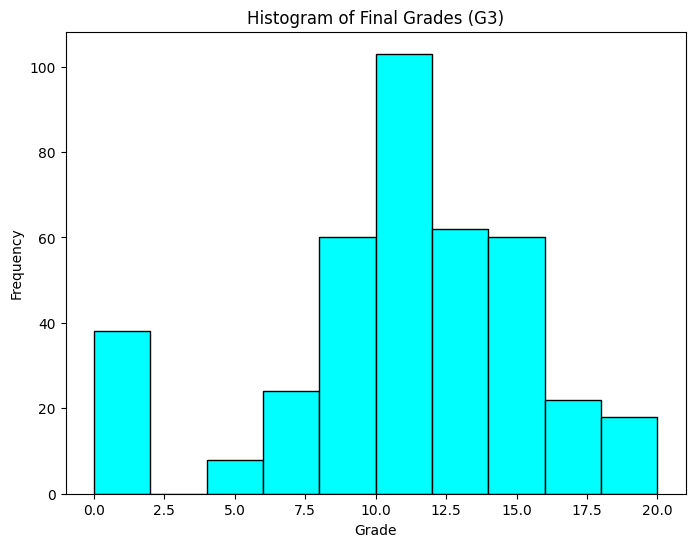

In [22]:
plt.figure(figsize=(8, 6))
plt.hist(student_df['G3'], bins=10, color='aqua', edgecolor='black')
plt.title('Histogram of Final Grades (G3)')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.show()

 Scatter plot between study time (study time) and final grade (G3)

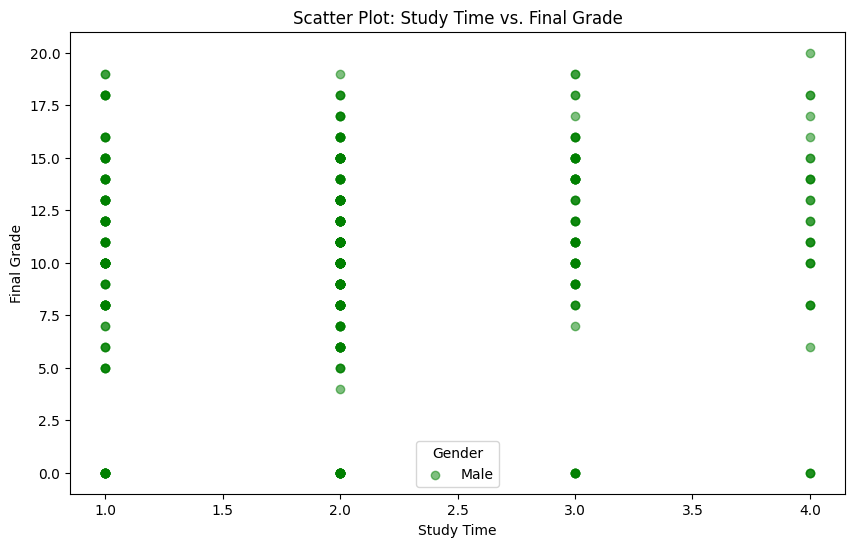

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(student_df['studytime'], student_df['G3'], alpha=0.5, color='green')
plt.title('Scatter Plot: Study Time vs. Final Grade')
plt.xlabel('Study Time')
plt.ylabel('Final Grade')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()


Bar chart comparing the average scores of male and female students

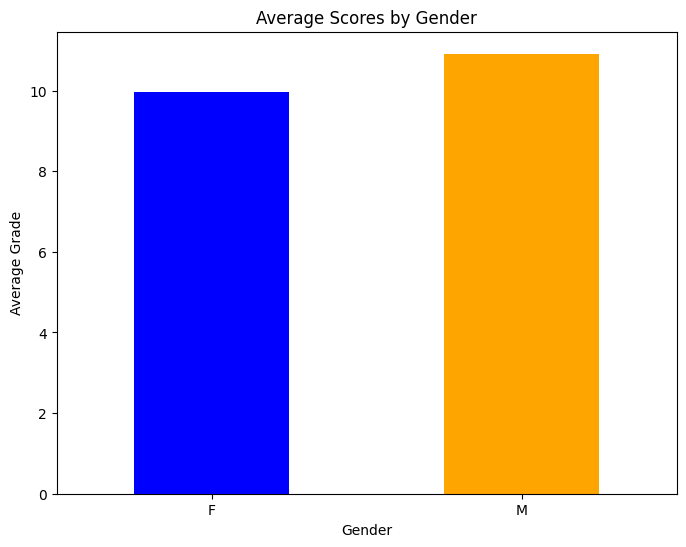

In [24]:
plt.figure(figsize=(8, 6))
avg_grade_by_gender.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Grade')
plt.xticks(rotation=0)
plt.show()